# ***Synthetic Data***
 
this file contains 3 Classification & 3 Clustring methods based on the Synthetic Data, the steps are as follows

1. Importing (calling) libraries and methods
2. Initilizing Functions
3. Creating & Loading Dataset
4. Spiliting Data
5. Classification 
    * K Nearest Neighbors
    * SVM: Support Vector Machine
    * NN: Nureal Network
6. Clustring
    * Heretical Clustering 
    * KMeans
    * DBSCAN






# **1.Importing (calling) libraries and methods** 

In [96]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Clasification Libraries
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
# Clustring Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In Python, you can turn off user warnings by using the warnings module and setting the appropriate warning filter. To disable all user warnings, you can use the following code:
```python
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
```
This code imports the warnings module and sets a filter to ignore any warnings of the UserWarning category. Keep in mind that ignoring all user warnings might hide important information, so it's generally better to address the underlying issues that cause the warnings instead of suppressing them entirely.

In [97]:
#'''
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
#'''

# **2.Initilizing Functions**

* ## Show function:

    The function is to demonstrate the graphs using matplotlib, it first sets the x-axis and y-axis labels to "x1" and "x2". It then sets the title of the plot to the value of the title argument. Finally, it creates the scatter plot using the `plt.scatter()` function, passing in the first and second columns of X as the x and y coordinates, respectively. The c parameter is set to the label argument, which colors each data point according to its label. The s parameter sets the size of the data points.


* ## accuracy function:

    The function calculates the accuracy of the classifier using the score method of the classification_method object. The score method returns the mean accuracy of the classifier on the test dataset. Next, the function calculates the confusion matrix and classification report using the confusion_matrix and classification_report functions from the sklearn metrics module. The confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the classifier. The classification report shows the precision, recall, and F1-score for each class in the dataset is to gives the user feedback on thier Classification methods by thier test set of data
* ## C_accuracy function:
    The function that calculates and prints the accuracy of a given set of predictions for Cluster methods. The function first calculates the number of correct predictions by counting the number of indices where the predicted label matches the true label. It does this using the `np.count_nonzero` function from the NumPy library. 
    the function calculates the accuracy by dividing the number of correct predictions by the total number of predictions and multiplying by 100 to convert to a percentage. this is to gives the user feedback on thier Clustring methods by thier test set of data.


In [98]:
def show(title,X,label):
  plt.xlabel('x1')
  plt.ylabel('x2')

  # displaying the title
  plt.title(title)

  # display the graph
  plt.scatter(X[:, 0], X[:, 1], c=label, s=2)

In [99]:
def accuracy (classification_method, method_pred,X_test,Y_test):
  # Print the accuracy of the classifier
  print("Accuracy:", classification_method.score(X_test,Y_test))

  # Print the confusion matrix and classification report
  print("\nConfusion Matrix:")
  print(confusion_matrix(Y_test, method_pred)) #A confusion matrix is a table that is used to define the performance of a classification algorithm.

  print("\nClassification Report:")
  print(classification_report(Y_test, method_pred))

In [100]:
def C_accuracy(Pred,Y_test):
  no = np.count_nonzero(Pred == Y_test)
  l = len(Pred)
  print(f"Accuracy :{(no/l)*100}")

# **3.Creating & Loading Dataset**
# *Ploting the Synthetic Dataset with and without labels*
The cell below creates a synthetic dataset using the `make_classification` function from the sklearn.datasets module and plots the dataset using the show function you provided earlier.
It creates a 2-dimensional dataset with 2 informative features and 2000 data points, where each point belongs to one of two classes/Clusters. The dataset is then visualized using scatter plots, where the color of each point corresponds to its class label.

Note: that I've added `plt.show()` at the end to display the plot, and I've used `plt.scatter` instead of show to plot the data points.

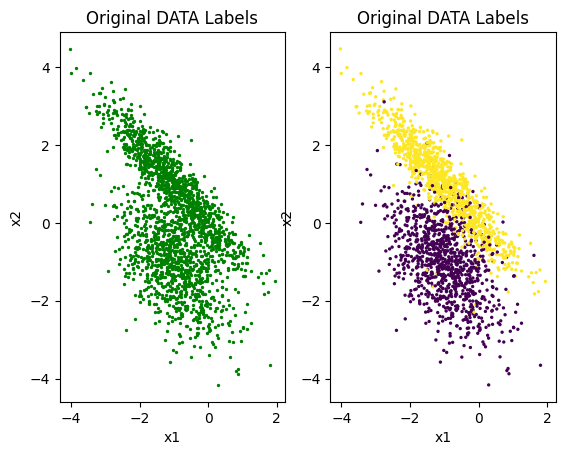

In [101]:
# Create dataset
n_points =2000
n_features=2


Data, labels=make_classification(n_samples=n_points, n_features=n_features, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
Data= np.array([Data[:,0], Data[:,1],np.zeros(n_points)])
Data=np.transpose(Data)

plt.subplot(1, 2, 1)
show(title="Original DATA Labels", X=Data, label="green")
plt.subplot(1, 2, 2)
show(title="Original DATA Labels", X=Data, label=labels)

# **4.Spiliting Data into Training and Testing set**
# *by 1:3 for test and train split*


In [102]:
# Deleting the 3nd column (index 1)
Data = np.delete(Data, 2, axis=1)

The `train_testsplit` function randomly splits the data two subsets to a training and a testing set. The `test_size` parameter is set to *0.25*, which means that *25%* of the data will be used for testing and the remaining *75%* will be used for training dataset.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.25)

# **5.Classification**
## **5.1.KNN: K Nearest Neighbour**
This cell trains a k-nearest neighbours (KNN) classifier using the KNeighboursClass class from scikit-learn, and then uses it to predict the labels the test set. The KNeighboursClass class takes a parameter `n_neighbors` which specifies the number of nearest neighbors to use for classification In this case, `n_neighbors` is set to 16. Also `metric` that classifies which metric method to be used for calculation that is set to *'euclidean'*.In this function there is a possibility to set the weights to uniform (same) for tall the neighbours or weighting them by distance. The `fit` method trains the classifier using the training set, and the predict method uses the trained classifier to predict the labels of the test set. Finally, The `accuracy` and `show` functions that in order they compute the accuracy of the classifier and visualize the predicted labels.



Accuracy: 0.94

Confusion Matrix:
[[218  21]
 [  9 252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       239
           1       0.92      0.97      0.94       261

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



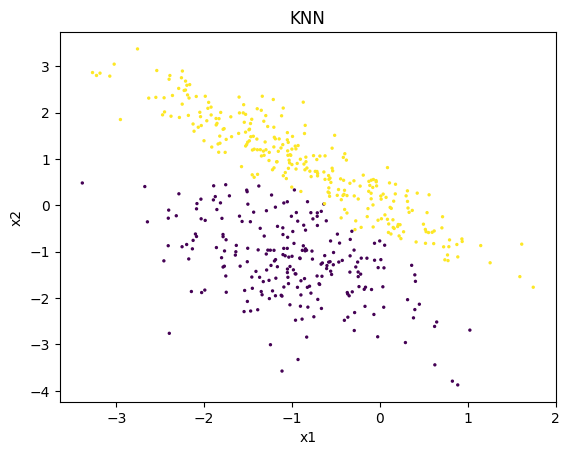

In [104]:
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean', weights='uniform')

# Train the classifier using the training set
knn.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
knn_pred = knn.predict(X_test)

accuracy (knn, knn_pred,X_test,y_test)
show(title="KNN", X=X_test, label=knn_pred)

KNN Findings : by adjusting `n_neighbors` starting from 5 the accuracy is set to *92.8%* and by raising this value to 9 we get more accuracy  nearly 93.8% this value will inbe the samecrease until reaching `n_neighbors` equal to 15 the accuracy will be 94 after 15 every value will decrease the accuracy of the KNN method.
the accuracy will drop when the weighting of the points is set to 'distance'. and it's kept to 'uniform' where all the point have the same weight.  

## **5.2.SVM: Support Vector Machine**
This cell provides a Support Vector Classifier (SVM) trained with a training set and then used to predict the labels of a test set. The accuracy, confusion matrix, and classification report  are then printed and ploted using `accuracy` and `show` functions.

Accuracy: 0.932

Confusion Matrix:
[[216  23]
 [ 11 250]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       239
           1       0.92      0.96      0.94       261

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



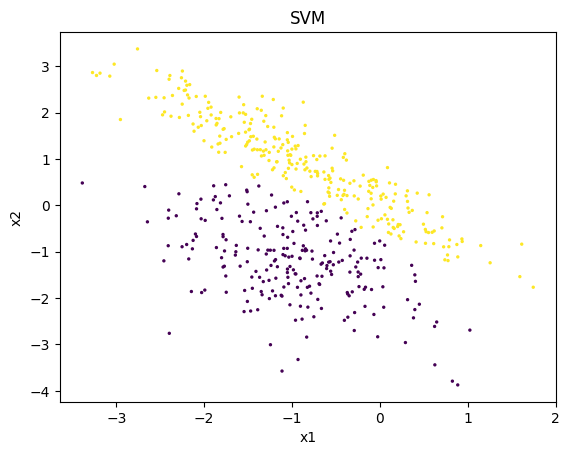

In [105]:
svm = SVC(kernel='rbf', probability=True, shrinking=True, max_iter=250)

# Train the classifier using the training set
svm.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
svm_pred = svm.predict(X_test)

accuracy (svm, svm_pred,X_test,y_test)
show(title="SVM", X=X_test, label=svm_pred)

SVM findings: by using the kernel of SVM where are choosing how does the algorithm works and by choosing 'rbf' (radial basis function kernel) as the kernel and setting the maximum iterations equal or above 200 and turning the probability function to True we get the accuracy of *93.2%* from this method on the synthetic data.

## **5.3.NN: Nureal Network (Multilayer)**
This cell will create a neural network, it will train the network on the training data and at the end it will make predictions on the test data and calculate the accuracy of those predictions. Finally, it will display a scatter plot of the test data, with each point colored according to the network's predicted class.

Accuracy: 0.932

Confusion Matrix:
[[217  22]
 [ 12 249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       239
           1       0.92      0.95      0.94       261

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



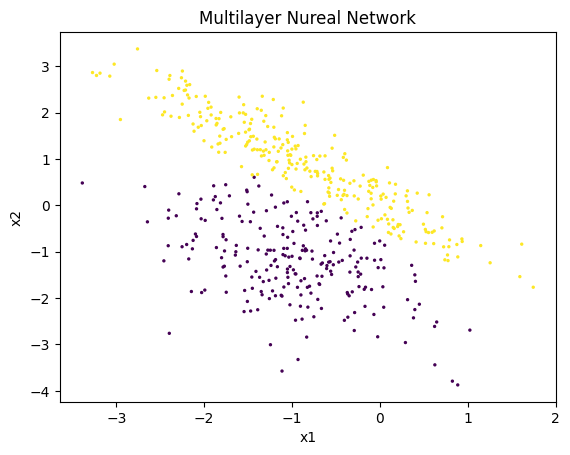

In [154]:
NN = MLPClassifier(hidden_layer_sizes=(6,3), activation='relu', alpha= 0.0001, max_iter= 350) # can choose between identity(%93), logistic(%93.6), tanh(%94), relu(%94),
NN.fit(X_train, y_train)
NN_pred = NN.predict(X_test)

accuracy (NN, NN_pred,X_test,y_test)
show(title="Multilayer Nureal Network", X=X_test, label=NN_pred)

NN findings: This neural network will adapt an accuracy of over *93%* with two hidden layer of size 6 and in order , using the rectified linear unit (ReLU) as activation function. and maximum iterations of  300, with an learning rate of 0.0001.

# **6.Clustering**
## **6.1.Hierarchical Clustering**
This cell implements a hierarchical clustering using the AgglomerativeClustering algorithm from the sklearn library, like the classifications method these methods also been ploted and their accuracy have been calculated. in this hierarchical clustering part we are having two methods of ploting firstly ploting the points with the labels and the other one the agglomerative tree of choosing the points structure.

Accuracy :73.2


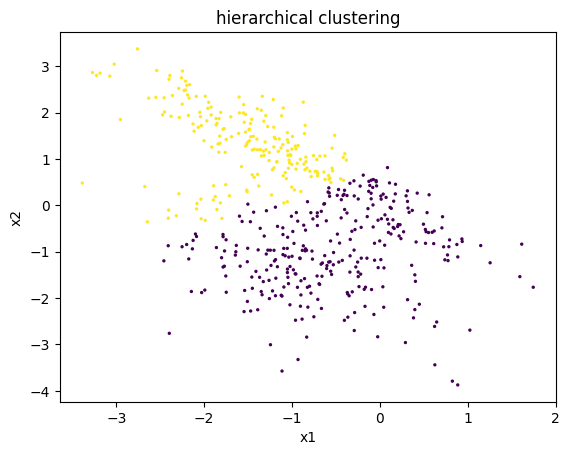

In [163]:
n_clusters = 2
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete')
hierarchical_clustering.fit(X_train, y_train)
hierarchical_clustering.labels_
HC_pred = hierarchical_clustering.fit_predict(X_test)
C_accuracy(HC_pred,y_test)
show(title="hierarchical clustering", X=X_test, label=HC_pred)

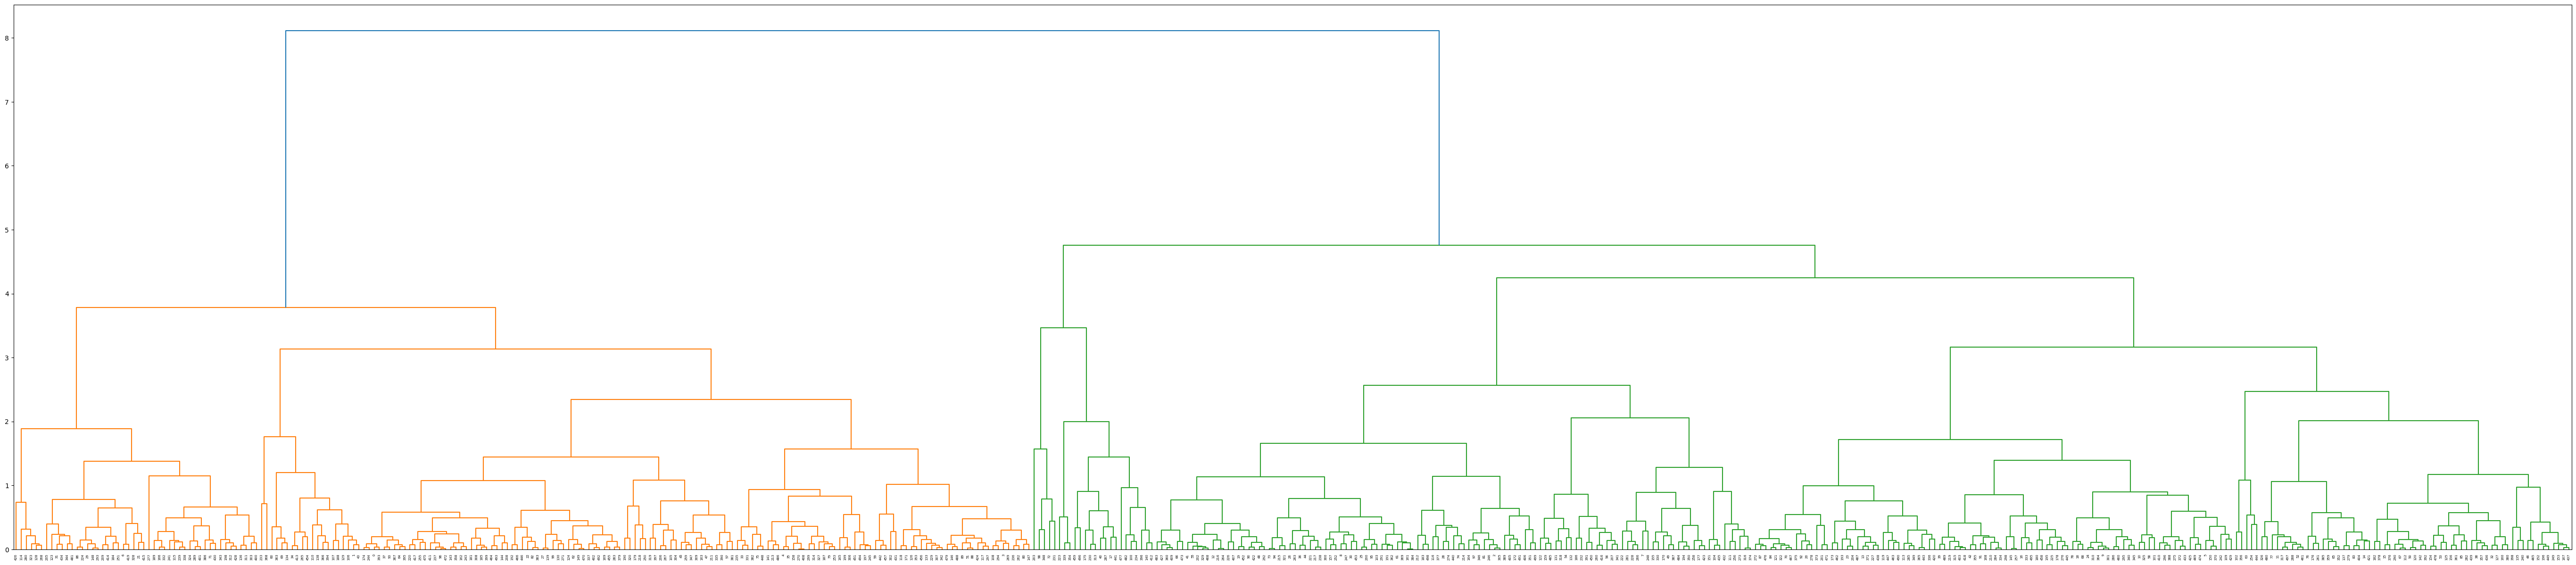

In [162]:
plt.figure(figsize=(70, 15))
linkage_data = linkage(X_test, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.show()

hierarchical clustering findings: if we set the metrics to euclidean and the algorithm to complete(max) wi will end up with the highest accuracy for this shape were the accuracy is 73% not as high compred to classification methods.

## **6.2.Kmeans Clustering**
This cell is implementing K-means cluster, The algorithm is fit on the training data and then the fit_predict method is called on the test data to get the cluster predictions. The accuracy of the predictions is then calculated using the C_accuracy function. Finally, the clusters are visualized using the show function and the cluster centers are plotted using matplotlib's scatter function.

Accuracy :75.6


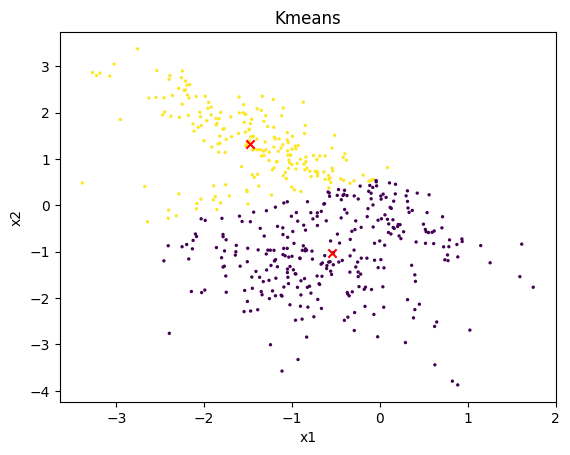

In [178]:
n_clusters = 2
kmeans_clustering = KMeans(n_clusters=n_clusters, n_init=2, init= "k-means++", max_iter=250)
kmeans_clustering.fit(X_train, y_train)
KM_pred = kmeans_clustering.fit_predict(X_test)
C_accuracy(KM_pred,y_test)
show(title="Kmeans", X=X_test, label=KM_pred)
plt.scatter(kmeans_clustering.cluster_centers_[:, 0], kmeans_clustering.cluster_centers_[:, 1],marker='x', color='red')

KMeans findings: KMeans clustering with `n_init` parameter to 2, which is the number time the k-means algorithm will be run with different centroid seeds. and by using "k-means++" algorithm that enhances the kMeans, in which it chooses the initial centers in a smart way to speed up convergence. The `max_iter` parameter is set to 250, which is the maximum number of iterations of the k-means algorithm for a single run and by setting these the maximum accuracy of this method on the synthesis data happens with *75.6%* happens which is still lower than the classifers but more accurate than the hierarchical clustering.

## **6.3.DBSCAN Clustering : Density Based Spatial Clustring**
This cell is creating an instance of the DBSCAN clustering algorithm from the sklearn library. and like all others this algorithm is set to be fitted and trained and then uses the C_accuracy and ploting.

Accuracy :75.8


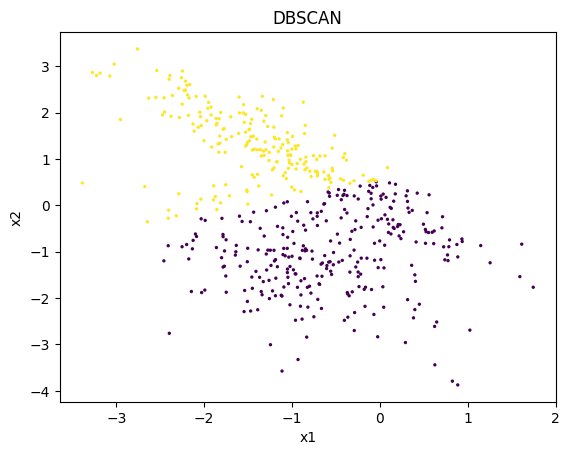

In [206]:
eps=1
min_samples=20
dbscan_clustering = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan_clustering.fit(X_train, y_train)
dbscan_pred = kmeans_clustering.fit_predict(X_test)
C_accuracy(dbscan_pred,y_test)
show(title="DBSCAN", X=X_test, label=dbscan_pred)

DBSCAN findings: by setting the radius of DBSCAN to more than 0.5 in this example its been set to 1 and minimum samples to more than 15 in this example 20 we arrive to the maximum accuracy of *75.8 %*